<a href="https://colab.research.google.com/github/ELBrown11/KaggleCompetitionSubmission/blob/main/KNNCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Digit Recognizer Competition Submission**

https://www.kaggle.com/c/digit-recognizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, \
confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
#read data
train_file = '/content/drive/MyDrive/digit-recognizer/train.csv'
test_file = '/content/drive/MyDrive/digit-recognizer/test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

labels = train_df.iloc[:,0].values.astype('int32')

X_train = (train_df.iloc[:,1:].values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 
X_test = (test_df.values).astype('float32')



input_shape = X_train.shape[1]
nb_classes = y_train.shape[1]
nb_classes

10

In [ ]:
y_train.value_counts()

In [ ]:
#fit and transform test and train data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#function to shorten time is takes to create plots
def plot_history(history, metric=None):
 
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

## **Model 1**

In [ ]:
#neural network
input_shape = X_train.shape[1]
model1 = Sequential()

model1.add(Dense(10, activation='relu',
                 input_dim =input_shape))
model1.add(Dense(10))

#compile model
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#fit model
history1 = model1.fit(X_train,y_train,
                    epochs=50,
                    validation_split=.1)

Epoch 1/50
1182/1182 [==============================] - 3s 2ms/step - loss: 7.3183 - accuracy: 0.0983 - val_loss: 7.1775 - val_accuracy: 0.1040
Epoch 2/50
1182/1182 [==============================] - 2s 2ms/step - loss: 7.9666 - accuracy: 0.0965 - val_loss: 10.2918 - val_accuracy: 0.1055
Epoch 3/50
1182/1182 [==============================] - 2s 2ms/step - loss: 7.4325 - accuracy: 0.0973 - val_loss: 6.3565 - val_accuracy: 0.1045
Epoch 4/50
1182/1182 [==============================] - 3s 2ms/step - loss: 6.5693 - accuracy: 0.0966 - val_loss: 8.1141 - val_accuracy: 0.1043
Epoch 5/50
1182/1182 [==============================] - 2s 2ms/step - loss: 6.2146 - accuracy: 0.0962 - val_loss: 6.4014 - val_accuracy: 0.1043
Epoch 6/50
1182/1182 [==============================] - 3s 2ms/step - loss: 6.4683 - accuracy: 0.0962 - val_loss: 6.5168 - val_accuracy: 0.1043
Epoch 7/50
1182/1182 [==============================] - 2s 2ms/step - loss: 6.6748 - accuracy: 0.0962 - val_loss: 6.6009 - val_accuracy

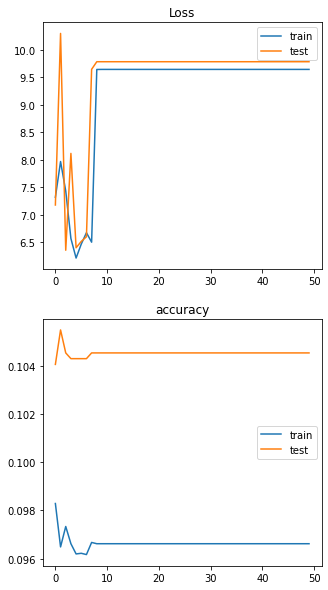

In [ ]:
#use plot function to verify how the model is doing
plot_history(history1, 'accuracy')

## **Model 2**

In [ ]:
#neural network
input_shape = X_train.shape[1]
model2 = Sequential()

model2.add(Dense(10, activation='relu',
                 input_dim =input_shape))
model2.add(Dense(20))#added a layer with 20 nodes
model2.add(Dense(10, activation='softmax')) 


#compile model
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#fit model
history2 = model2.fit(X_train,y_train,
                    epochs=50,
                    validation_split=.1)

Epoch 1/50
1182/1182 [==============================] - 3s 2ms/step - loss: 2.4165 - accuracy: 0.1712 - val_loss: 2.0320 - val_accuracy: 0.2102
Epoch 2/50
1182/1182 [==============================] - 2s 2ms/step - loss: 2.0102 - accuracy: 0.2107 - val_loss: 1.9882 - val_accuracy: 0.2229
Epoch 3/50
1182/1182 [==============================] - 2s 2ms/step - loss: 1.9499 - accuracy: 0.2307 - val_loss: 1.8965 - val_accuracy: 0.2529
Epoch 4/50
1182/1182 [==============================] - 3s 2ms/step - loss: 1.8275 - accuracy: 0.2789 - val_loss: 1.7590 - val_accuracy: 0.2845
Epoch 5/50
1182/1182 [==============================] - 3s 2ms/step - loss: 1.6783 - accuracy: 0.3168 - val_loss: 1.6841 - val_accuracy: 0.3240
Epoch 6/50
1182/1182 [==============================] - 2s 2ms/step - loss: 1.6201 - accuracy: 0.3352 - val_loss: 1.6481 - val_accuracy: 0.3290
Epoch 7/50
1182/1182 [==============================] - 3s 2ms/step - loss: 1.5789 - accuracy: 0.3497 - val_loss: 1.6035 - val_accuracy:

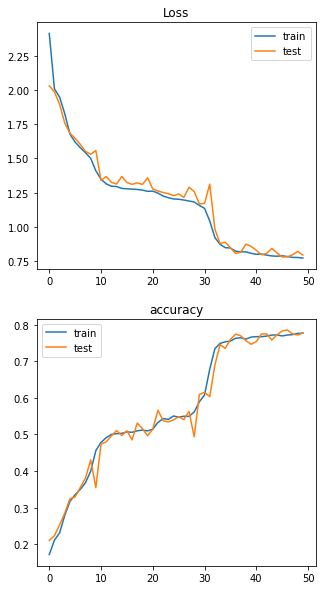

In [ ]:
#use plot function to verify how the model is doing
plot_history(history2, 'accuracy')

## **Model 3**

In [ ]:
#neural network
input_shape = X_train.shape[1]
model3 = Sequential()

model3.add(Dense(10, activation='relu',
                 input_dim =input_shape))
model3.add(Dense(20))#added a layer with 20 nodes
model3.add(Dense(10, activation='softmax'))


#compile model
model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#fit model
history3 = model3.fit(X_train,y_train,
                    epochs=100, #increase number of epochs
                    validation_split=.1)

Epoch 1/100
1182/1182 [==============================] - 43s 2ms/step - loss: 2.3780 - accuracy: 0.1854 - val_loss: 1.9736 - val_accuracy: 0.2500
Epoch 2/100
1182/1182 [==============================] - 3s 2ms/step - loss: 1.7652 - accuracy: 0.3059 - val_loss: 1.6129 - val_accuracy: 0.3586
Epoch 3/100
1182/1182 [==============================] - 3s 2ms/step - loss: 1.5458 - accuracy: 0.3635 - val_loss: 1.4742 - val_accuracy: 0.3840
Epoch 4/100
1182/1182 [==============================] - 2s 2ms/step - loss: 1.4353 - accuracy: 0.4066 - val_loss: 1.4149 - val_accuracy: 0.4169
Epoch 5/100
1182/1182 [==============================] - 3s 2ms/step - loss: 1.3210 - accuracy: 0.4697 - val_loss: 1.2589 - val_accuracy: 0.4900
Epoch 6/100
1182/1182 [==============================] - 2s 2ms/step - loss: 1.1967 - accuracy: 0.5215 - val_loss: 1.1395 - val_accuracy: 0.5352
Epoch 7/100
1182/1182 [==============================] - 2s 2ms/step - loss: 1.0980 - accuracy: 0.5717 - val_loss: 1.0910 - val_a

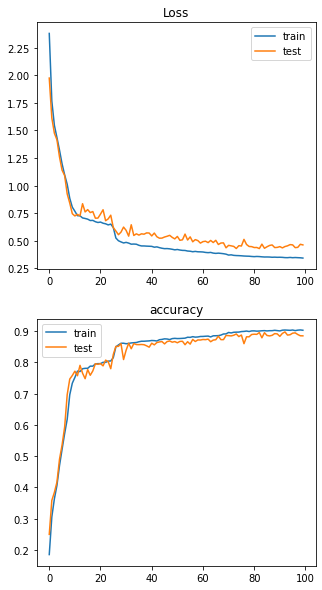

In [ ]:
#use plot function to verify how the model is doing
plot_history(history3, 'accuracy')

## **Model 4**

In [ ]:
#neural network
input_shape = X_train.shape[1]
model4 = Sequential()

model4.add(Dense(10, activation='relu',
                 input_dim =input_shape))
model4.add(Dense(20))#added a layer with 20 nodes
model4.add(Dense(10, activation='softmax'))


#compile model
model4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#fit model
history4 = model4.fit(X_train,y_train,
                    epochs=200, #increase number of epochs
                    validation_split=.1)

Epoch 1/200
1182/1182 [==============================] - 3s 2ms/step - loss: 2.5144 - accuracy: 0.3011 - val_loss: 1.4068 - val_accuracy: 0.4676
Epoch 2/200
1182/1182 [==============================] - 3s 2ms/step - loss: 1.2813 - accuracy: 0.5132 - val_loss: 1.1466 - val_accuracy: 0.5476
Epoch 3/200
1182/1182 [==============================] - 3s 2ms/step - loss: 1.0875 - accuracy: 0.5763 - val_loss: 1.0741 - val_accuracy: 0.5957
Epoch 4/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.9977 - accuracy: 0.6082 - val_loss: 1.0522 - val_accuracy: 0.6067
Epoch 5/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.9480 - accuracy: 0.6246 - val_loss: 1.0055 - val_accuracy: 0.6505
Epoch 6/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.8920 - accuracy: 0.6556 - val_loss: 0.8958 - val_accuracy: 0.6776
Epoch 7/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.8197 - accuracy: 0.7009 - val_loss: 0.8184 - val_ac

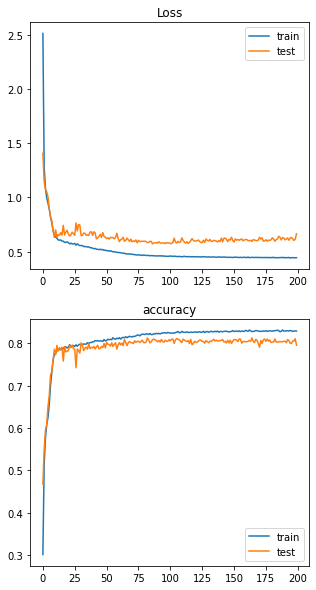

In [ ]:
#use plot function to verify how the model is doing
plot_history(history4, 'accuracy')

In [ ]:
#generate test predictions
print("Generating test predictions...")
preds = model3.predict(X_test, verbose=0)
predsS= np.argmax(preds,axis=1)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": predsS}).to_csv(fname, index=False, header=True)

write_preds(predsS, "keras-mlp.csv")

Generating test predictions...


# **Submission Screenshot**

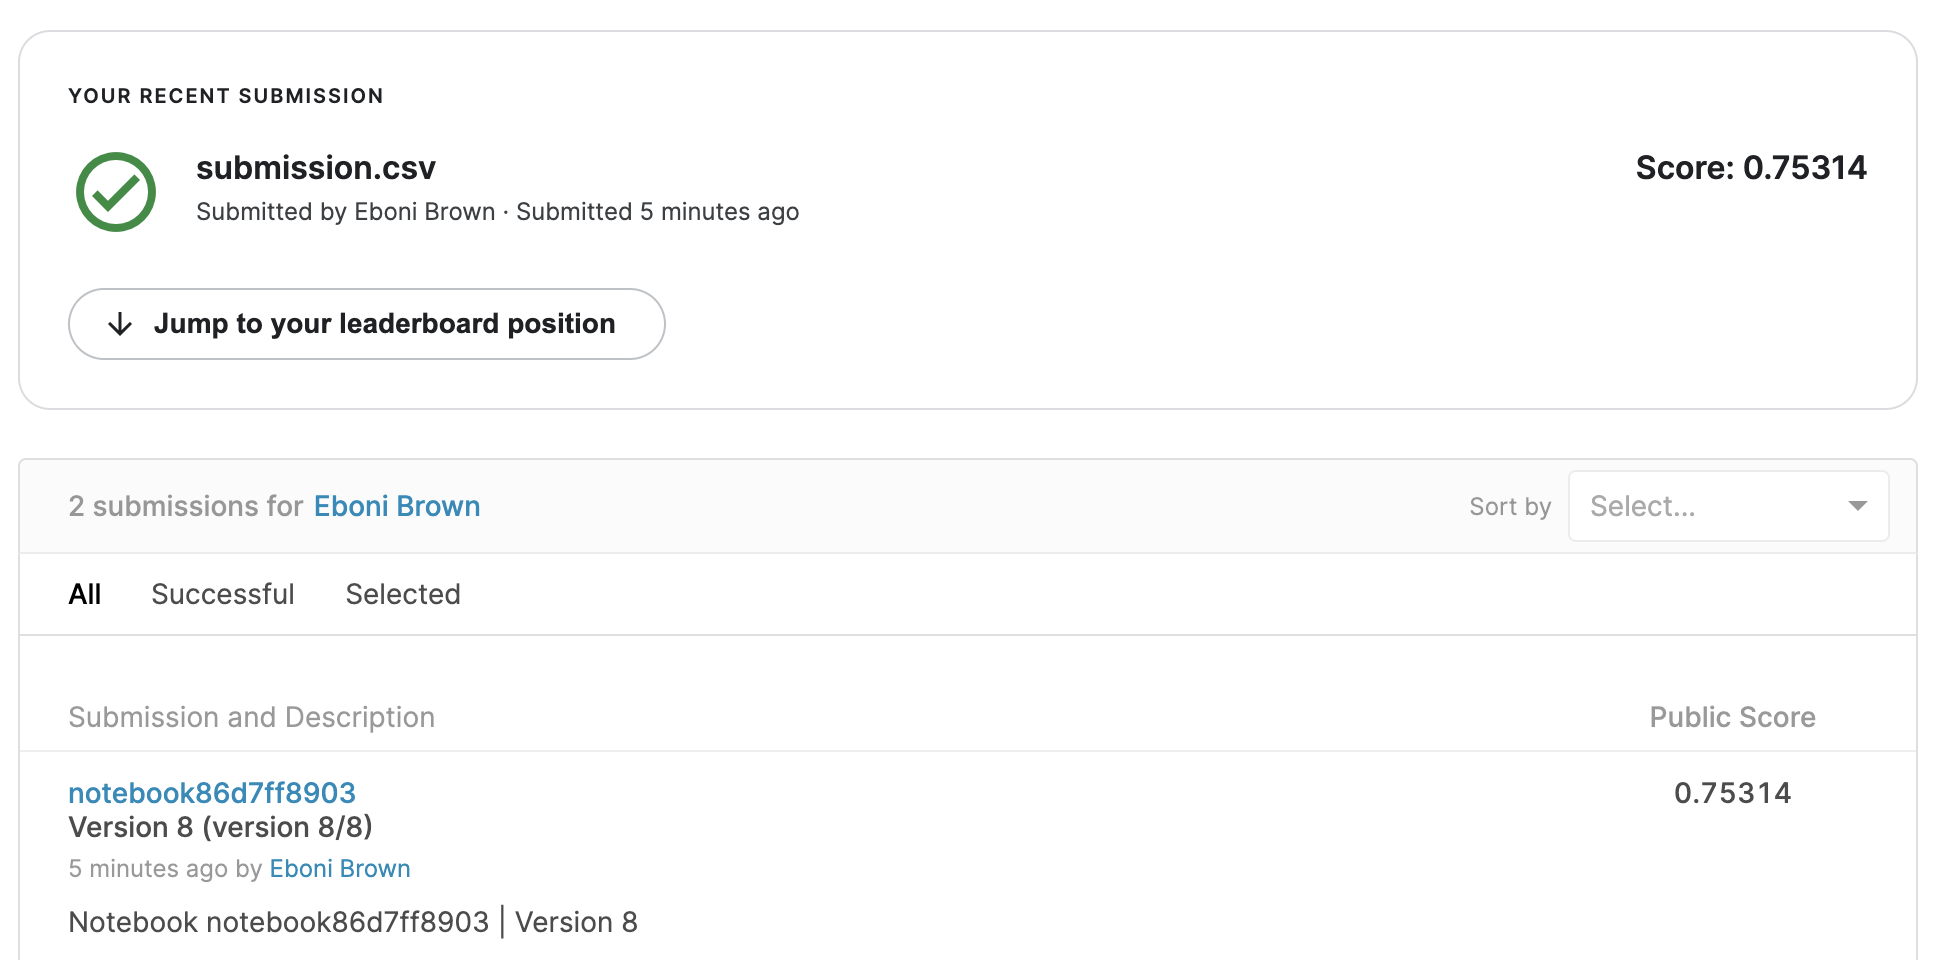

# **References**

- https://www.kaggle.com/fchollet/simple-deep-mlp-with-keras/code